<a href="https://colab.research.google.com/github/barbara99/Azubi_tmp/blob/main/Azubi_tmp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **📘 Term Deposit Subscription Prediction — Project Report**
Azubi Africa Talent Mobility Program

*   Objective: Build a machine learning model to predict whether a bank client will subscribe to a term deposit (y = yes/no) using client, campaign, and economic attributes.



# 🧰 1. Setup and Imports


In [1]:
# Basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn for preprocessing & modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import joblib


# 📂 2. Load and Preview Dataset

In [2]:
# Load dataset
# Load data
# Load data
df = pd.read_csv("/content/bank-additional-full.csv", sep=';')

# Data shape and preview
print(f"Dataset shape: {df.shape}")
df.head()


Dataset shape: (41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


#🔍 3. Data Exploration and Cleaning
🔎 Check for Missing or Unknown Values

In [3]:
# Check missing values (there are none in this dataset)
print(df.isnull().sum())

# Count "unknown" values in categorical columns
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"{col}: {df[col].value_counts().get('unknown', 0)} 'unknown'")


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64
job: 330 'unknown'
marital: 80 'unknown'
education: 1731 'unknown'
default: 8597 'unknown'
housing: 990 'unknown'
loan: 990 'unknown'
contact: 0 'unknown'
month: 0 'unknown'
day_of_week: 0 'unknown'
poutcome: 0 'unknown'
y: 0 'unknown'


🧾 Data Types and Summary Statistics


In [4]:
# Data Types and Summary Statistics

df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


#📊 4. Visualizing the Data
🎯 Target Variable Distribution

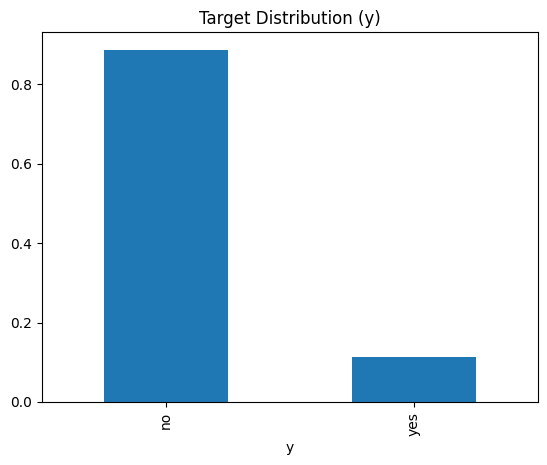

In [5]:
df['y'].value_counts(normalize=True).plot(kind='bar', title='Target Distribution (y)')
plt.show()


📁 Categorical Variables vs Target

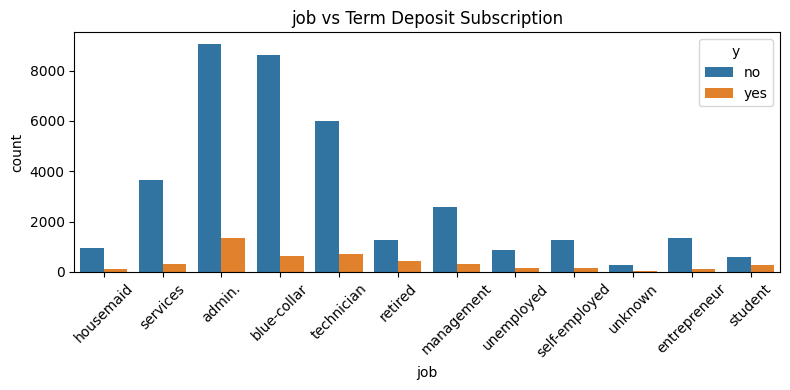

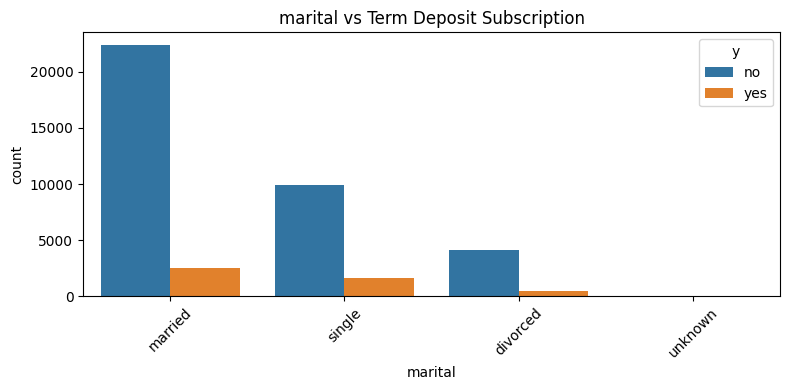

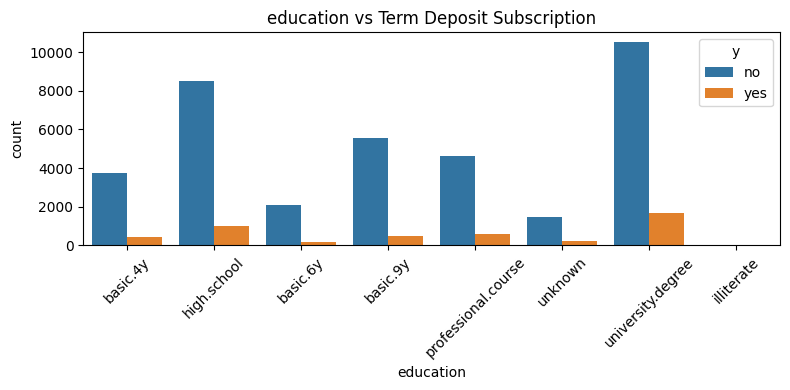

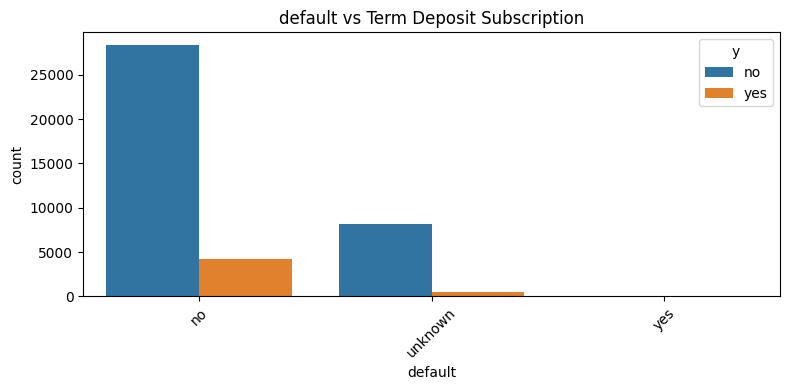

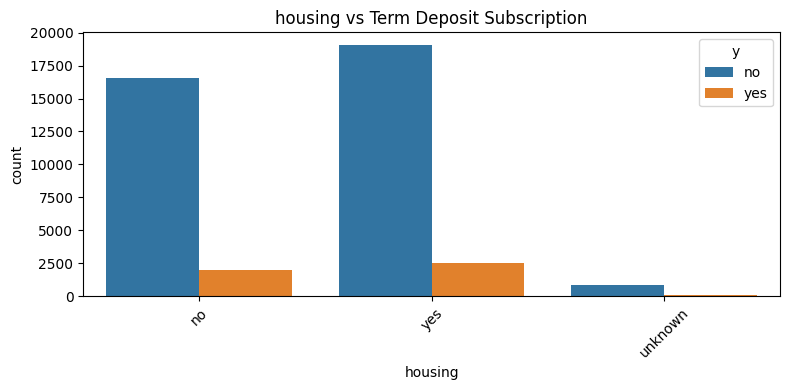

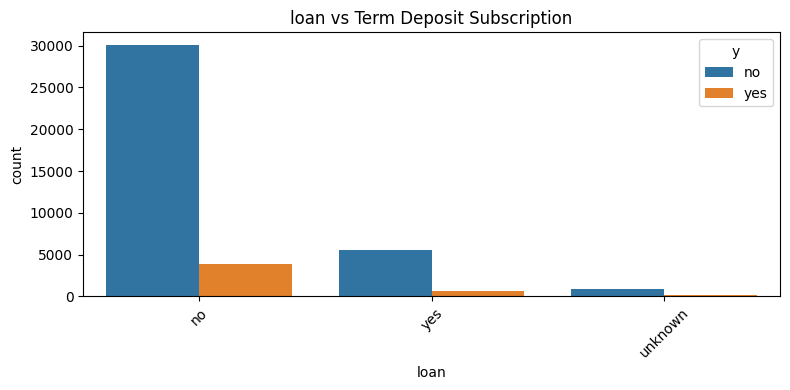

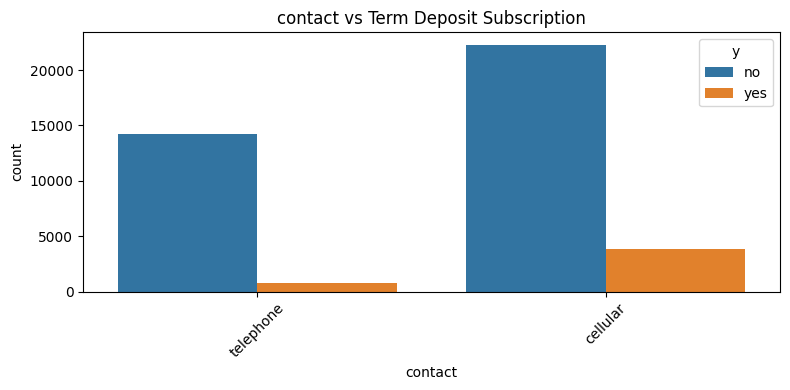

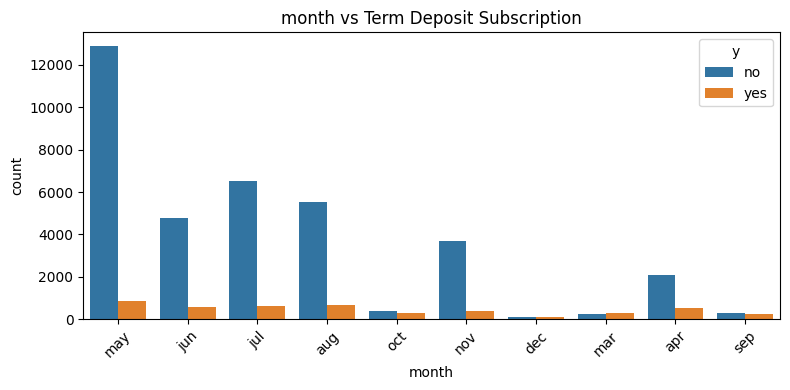

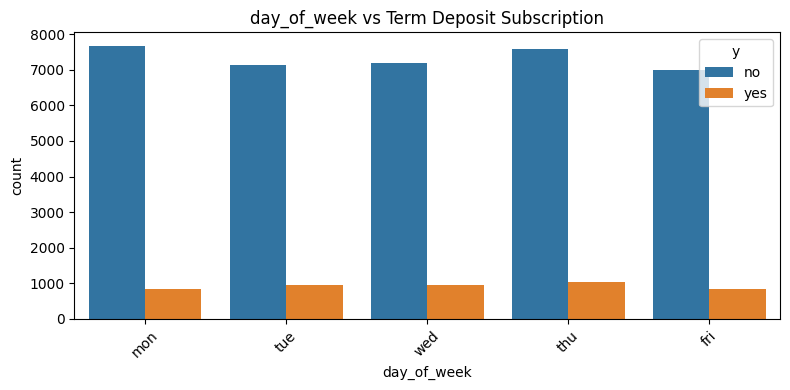

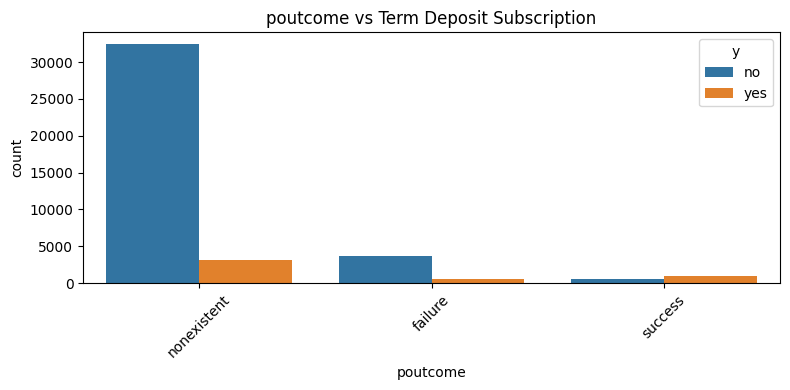

In [6]:
categoricals = ['job', 'marital', 'education', 'default', 'housing', 'loan',
                'contact', 'month', 'day_of_week', 'poutcome']

for col in categoricals:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, hue='y', data=df)
    plt.title(f'{col} vs Term Deposit Subscription')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


📈 Histograms of Numerical Features


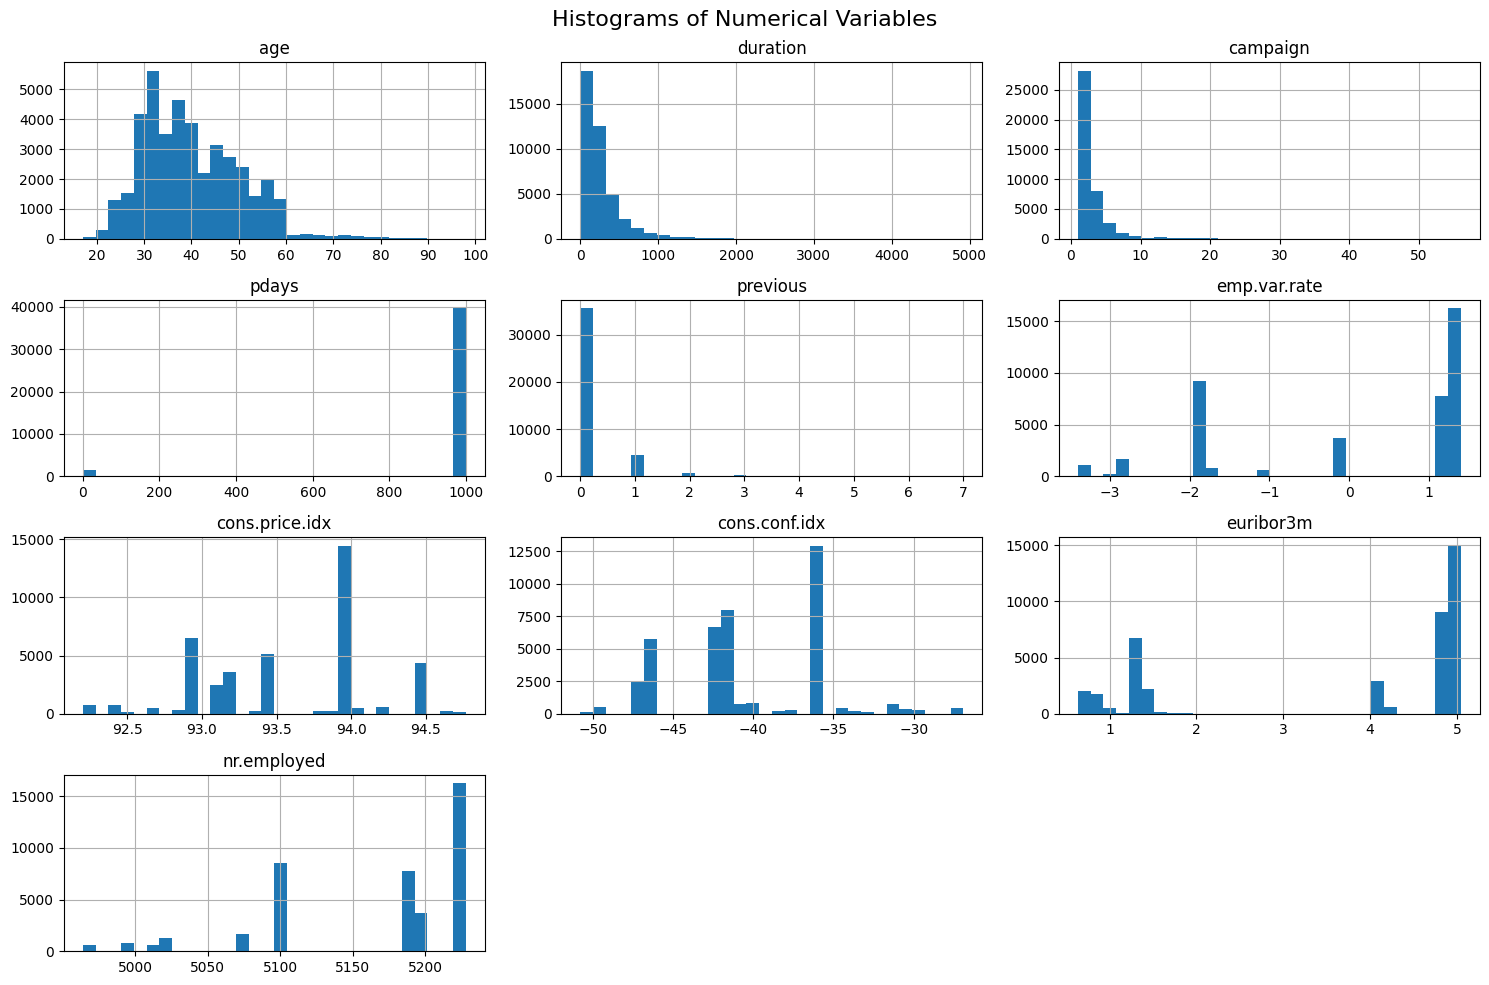

In [7]:
numericals = df.select_dtypes(include=['int64', 'float64']).columns

df[numericals].hist(figsize=(15, 10), bins=30)
plt.suptitle("Histograms of Numerical Variables", fontsize=16)
plt.tight_layout()
plt.show()


🔗 Correlation Heatmap

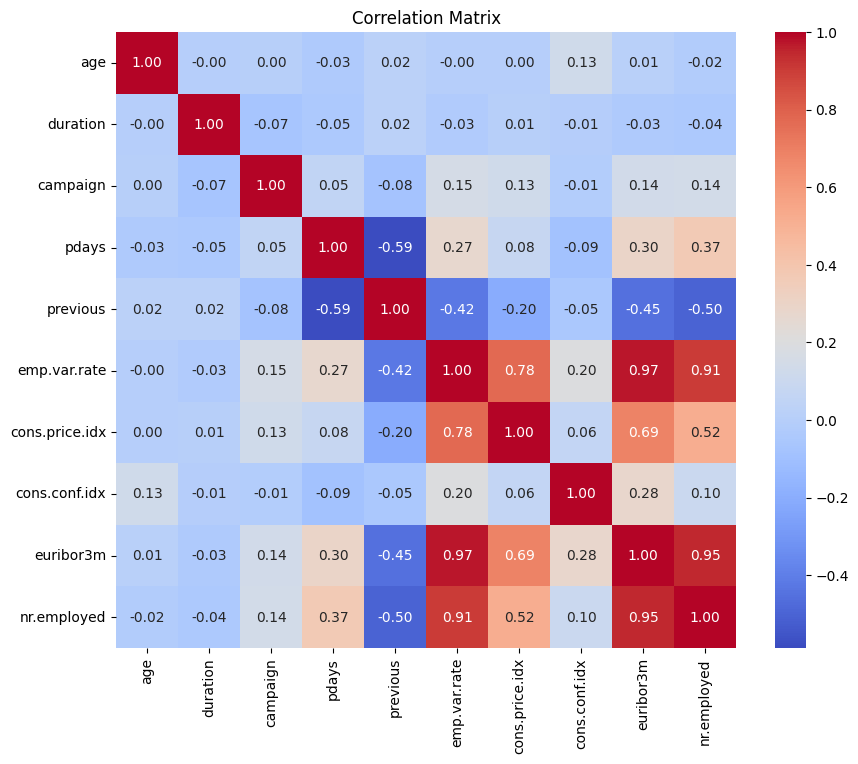

In [8]:
corr = df[numericals].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


📉 Boxplots for Outlier Detection

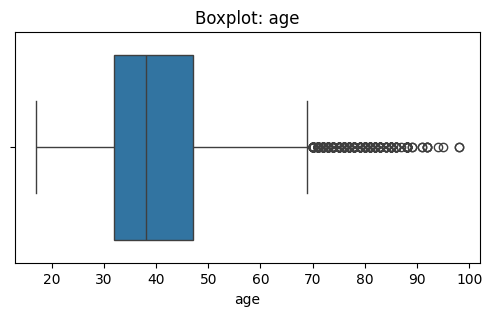

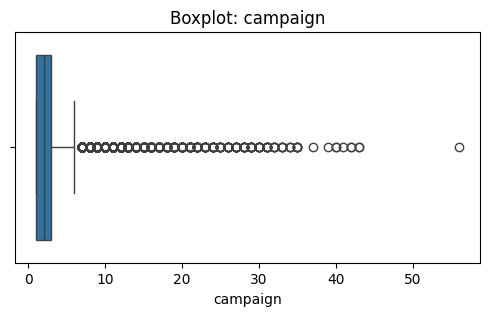

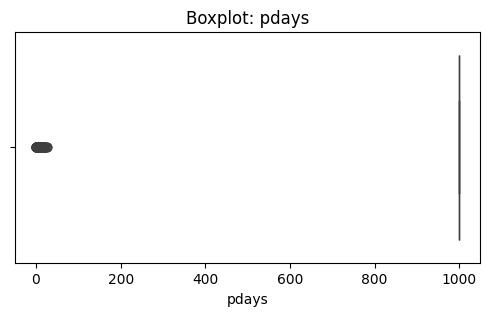

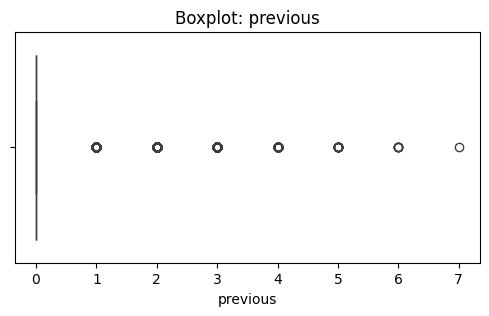

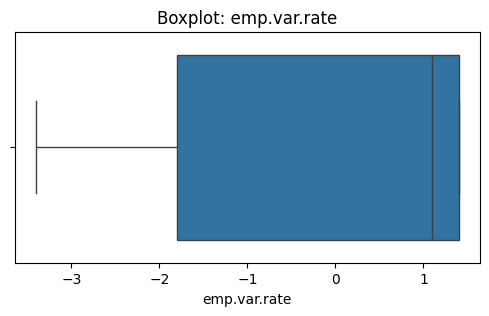

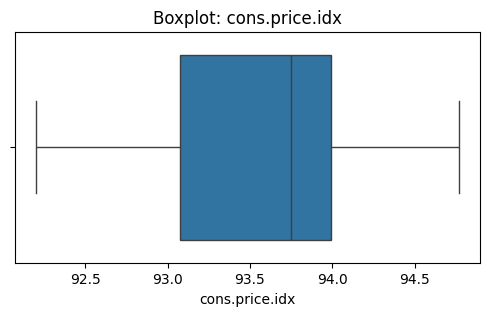

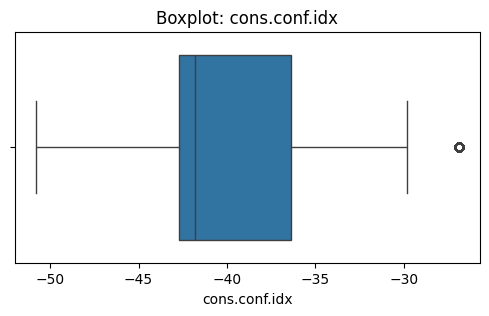

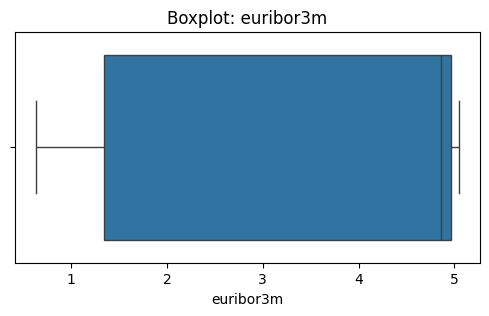

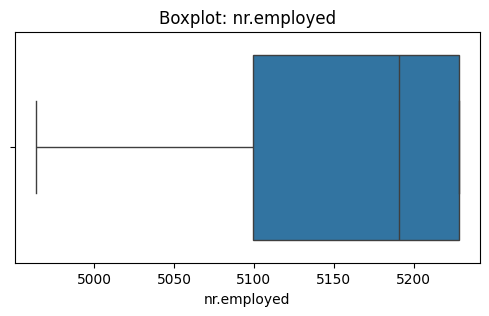

In [9]:
for col in ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot: {col}')
    plt.show()


#🧹 5. Data Preprocessing
- 🚫 Remove Data Leakage Column
- 🔍 Check Proportion of Unknowns


In [10]:
# Drop 'duration' due to data leakage concerns
df = df.drop(columns=["duration"])

# Check percentage of 'unknown' values per categorical column
for col in df.select_dtypes(include='object').columns:
    pct_unknown = round(df[col].value_counts(normalize=True).get('unknown', 0) * 100, 2)
    print(f"{col}: {pct_unknown}% unknown")


job: 0.8% unknown
marital: 0.19% unknown
education: 4.2% unknown
default: 20.87% unknown
housing: 2.4% unknown
loan: 2.4% unknown
contact: 0% unknown
month: 0% unknown
day_of_week: 0% unknown
poutcome: 0% unknown
y: 0% unknown


In [11]:
# Cross-tabulation between credit default and target
print(pd.crosstab(df['default'], df['y'], normalize='index') * 100)


y                no        yes
default                       
no        87.121026  12.878974
unknown   94.847040   5.152960
yes      100.000000   0.000000


💡 Feature Engineering: Financial Risk

In [12]:
# Create a financial risk feature by counting risky credit indicators
df['financial_risk'] = df.apply(lambda x: sum([
    x['loan'] == 'yes',
    x['housing'] == 'yes',
    x['default'] in ['yes', 'unknown']
]), axis=1)


#🧪 6. Modeling
- 📌 Encode Categorical Variables
- 🎯 Separate Features and Target



In [13]:
df_encoded = pd.get_dummies(df, drop_first=True)

# Separate features and target
X = df_encoded.drop('y_yes', axis=1)
y = df_encoded['y_yes']


🔀 Train-Test Split


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# ⚖️ 7. Handle Class Imbalance with SMOTE


In [15]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


# 🌲 8. Random Forest Classifier


In [16]:
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_resampled, y_resampled)

# Predict and evaluate on test data
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8852876911871813
              precision    recall  f1-score   support

       False       0.92      0.95      0.94      7303
        True       0.49      0.38      0.43       935

    accuracy                           0.89      8238
   macro avg       0.71      0.67      0.68      8238
weighted avg       0.87      0.89      0.88      8238

[[6937  366]
 [ 579  356]]


#⭐ 9. Feature Importance


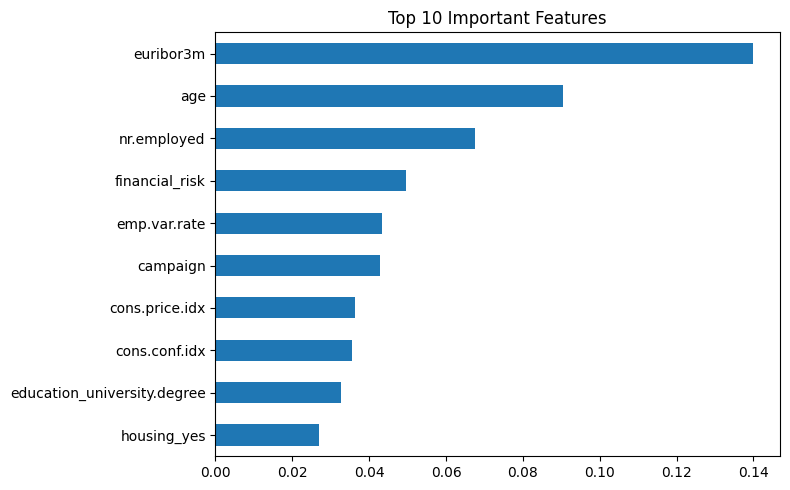

In [17]:
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
top_10 = importances.head(10)

plt.figure(figsize=(8,5))
top_10.plot(kind='barh', title='Top 10 Important Features')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


#🎯 10. Model with Top 20 Features


In [18]:
top_n = 20
selected_features = importances.head(top_n).index.tolist()

X_selected = X[selected_features]

X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(
    X_selected, y, test_size=0.2, random_state=42)

model_sel = RandomForestClassifier(random_state=42)
model_sel.fit(X_train_sel, y_train_sel)

y_pred_sel = model_sel.predict(X_test_sel)
print("Accuracy (selected features):", accuracy_score(y_test_sel, y_pred_sel))
print(classification_report(y_test_sel, y_pred_sel))


Accuracy (selected features): 0.8809176984705025
              precision    recall  f1-score   support

       False       0.91      0.96      0.93      7303
        True       0.46      0.28      0.35       935

    accuracy                           0.88      8238
   macro avg       0.69      0.62      0.64      8238
weighted avg       0.86      0.88      0.87      8238



# 🔁 11. Logistic Regression (Baseline Model)


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Scale features for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_model = LogisticRegression(class_weight='balanced', max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

y_pred_lr = lr_model.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.827628065064336
              precision    recall  f1-score   support

       False       0.94      0.86      0.90      7303
        True       0.35      0.61      0.44       935

    accuracy                           0.83      8238
   macro avg       0.65      0.73      0.67      8238
weighted avg       0.88      0.83      0.85      8238



#⚡ 12. XGBoost Classifier


In [20]:
!pip install xgboost

import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'scale_pos_weight': y_train.value_counts()[0] / y_train.value_counts()[1],
    'max_depth': 4,
    'eta': 0.1,
    'seed': 42
}

xgb_model = xgb.train(params, dtrain, num_boost_round=100)

y_pred_prob_xgb = xgb_model.predict(dtest)
y_pred_xgb = (y_pred_prob_xgb >= 0.5).astype(int)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


<ipython-input-20-1880942680>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'scale_pos_weight': y_train.value_counts()[0] / y_train.value_counts()[1],


XGBoost Accuracy: 0.840616654527798
              precision    recall  f1-score   support

       False       0.95      0.87      0.91      7303
        True       0.38      0.62      0.47       935

    accuracy                           0.84      8238
   macro avg       0.66      0.74      0.69      8238
weighted avg       0.88      0.84      0.86      8238



#💾 13. Save Model Artifacts for Deployment



In [21]:
# Save feature names, model, and scaler for deployment
# joblib.dump(list(X_train.columns), 'feature_names.pkl')
# joblib.dump(model, 'model_rf.pkl')
# joblib.dump(scaler, 'scaler.pkl')


#✅ Final Notes
- Random Forest performed best overall and was chosen for deployment.

- The Streamlit app allows real-time prediction using saved model artifacts.

- The dataset was imbalanced, so SMOTE and class-weight tuning were essential.

- Key predictive features include age, euribor3m, campaign, and nr.employed.